In [3]:
import numpy as numpy
import pandas as pd

In [4]:
df_train = pd.read_csv('data/train_ver2.csv')

/var/folders/jl/5_rcdjz121v7rnhqrmsz6df80000gn/T/ipykernel_35415/1192977624.py:1: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('data/train_ver2.csv')


In [5]:
df_train.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


### Data Overview

In [6]:
df_train.shape

(13647309, 48)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

In [8]:
missing_value_percentage = df_train.isnull().sum()/len(df_train) * 100
missing_value_percentage

fecha_dato                0.000000
ncodpers                  0.000000
ind_empleado              0.203220
pais_residencia           0.203220
sexo                      0.203732
age                       0.000000
fecha_alta                0.203220
ind_nuevo                 0.203220
antiguedad                0.000000
indrel                    0.203220
ult_fec_cli_1t           99.818330
indrel_1mes               1.097513
tiprel_1mes               1.097513
indresi                   0.203220
indext                    0.203220
conyuemp                 99.986752
canal_entrada             1.363829
indfall                   0.203220
tipodom                   0.203227
cod_prov                  0.685784
nomprov                   0.685784
ind_actividad_cliente     0.203220
renta                    20.475648
segmento                  1.387585
ind_ahor_fin_ult1         0.000000
ind_aval_fin_ult1         0.000000
ind_cco_fin_ult1          0.000000
ind_cder_fin_ult1         0.000000
ind_cno_fin_ult1    

In [9]:
df_train['ncodpers'].nunique()

956645

## Customer Demographics & Behavior Analysis

### **Customer Segmentation**

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

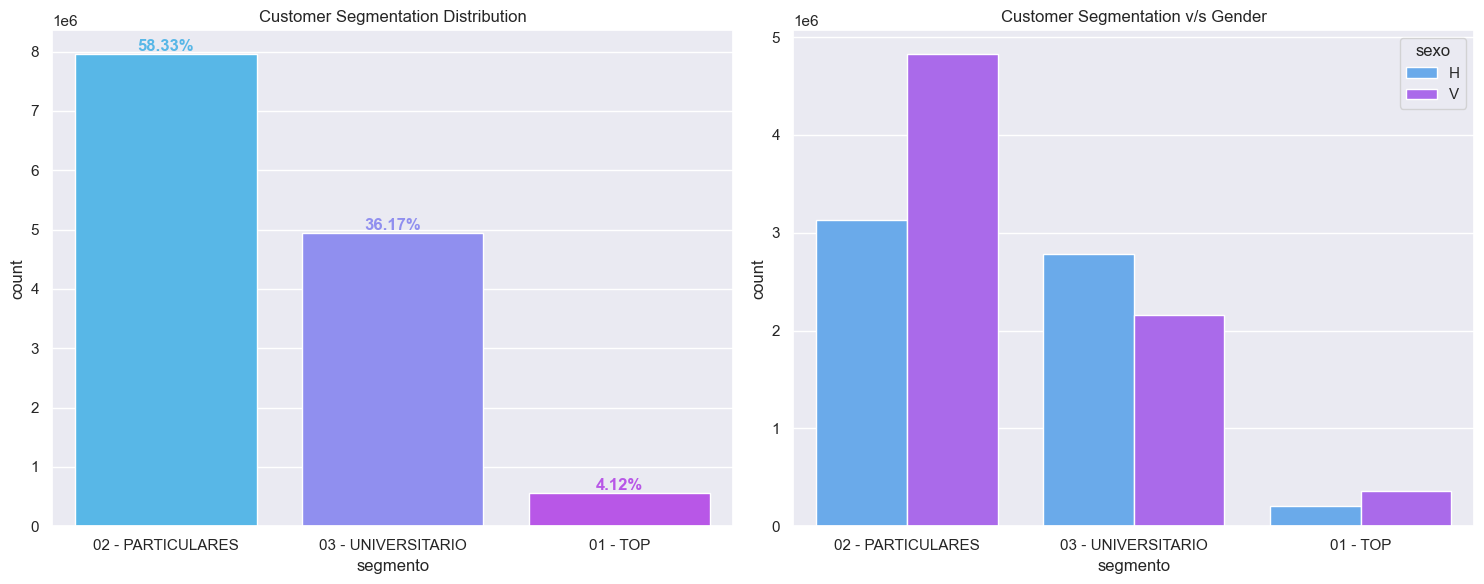

In [11]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

palette = sns.color_palette("cool", n_colors=3)

sns.countplot(x=df_train['segmento'],ax = ax[0],palette=palette)
total = len(df_train)
for bar in ax[0].patches:
    height = bar.get_height()
    percentage = f"{(height / total) * 100:.2f}%"
    ax[0].annotate(
        percentage,
        (bar.get_x() + bar.get_width() / 2, height + 1000),
        ha='center',
        va='bottom',
        fontweight='bold',
        color=bar.get_facecolor()
    )

ax[0].set_title("Customer Segmentation Distribution")
    
sns.countplot(x=df_train['segmento'],hue=df_train['sexo'],palette='cool',ax=ax[1])
ax[1].set_title('Customer Segmentation v/s Gender')
plt.tight_layout()
plt.show()

### **Age, Gender, Segmento**

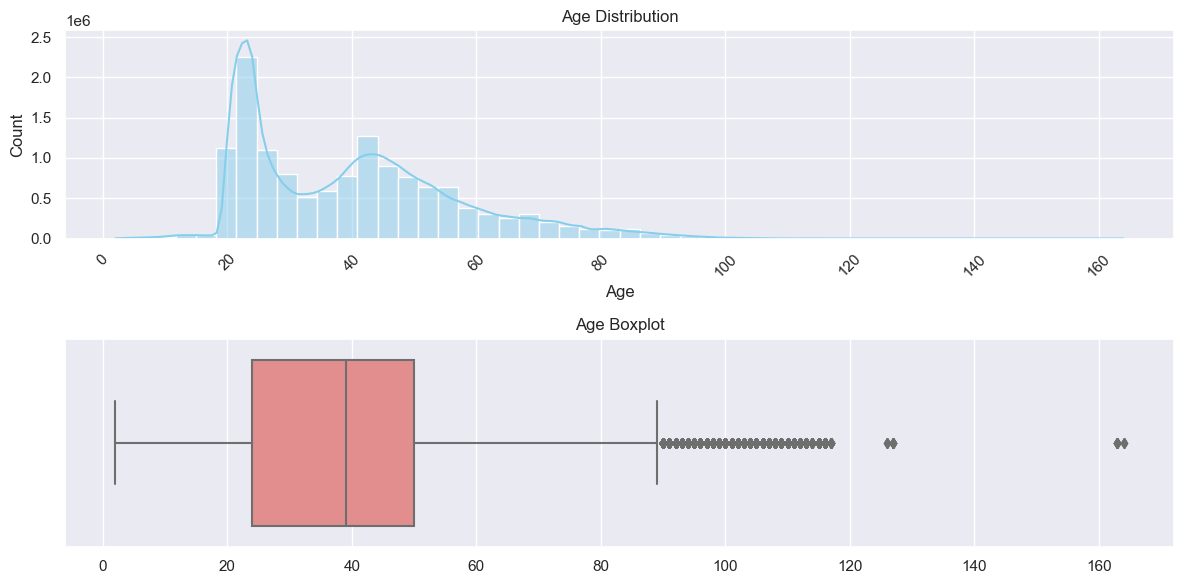

In [12]:
age_data = pd.to_numeric(df_train['age'], errors='coerce').dropna()


fig, axes = plt.subplots(2, 1, figsize=(12, 6))

sns.histplot(age_data, bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x=age_data, ax=axes[1], color='lightcoral')
axes[1].set(xlabel=None)
axes[1].set_title('Age Boxplot')

plt.tight_layout()
plt.show()


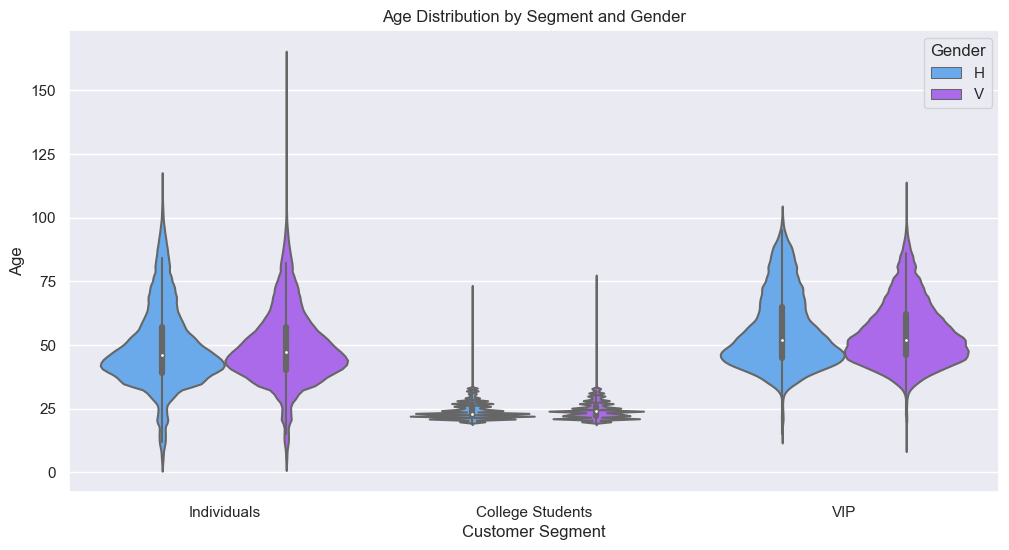

In [13]:
segment_labels = {
    '01 - TOP': 'VIP',
    '02 - PARTICULARES': 'Individuals',
    '03 - UNIVERSITARIO': 'College Students'
}

df_train['age'] = pd.to_numeric(df_train['age'], errors='coerce')
df_viz = df_train.dropna(subset=['age', 'segmento', 'sexo']).copy()

df_viz.loc[:, 'segmento'] = df_viz['segmento'].replace(segment_labels)

plt.figure(figsize=(12,6))
sns.violinplot(x='segmento', y='age', hue='sexo', data=df_viz, inner='box', palette='cool')
plt.title('Age Distribution by Segment and Gender')
plt.xlabel('Customer Segment')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.show()

### **Income distribution**

In [14]:
df_train['renta'].max()

28894395.51

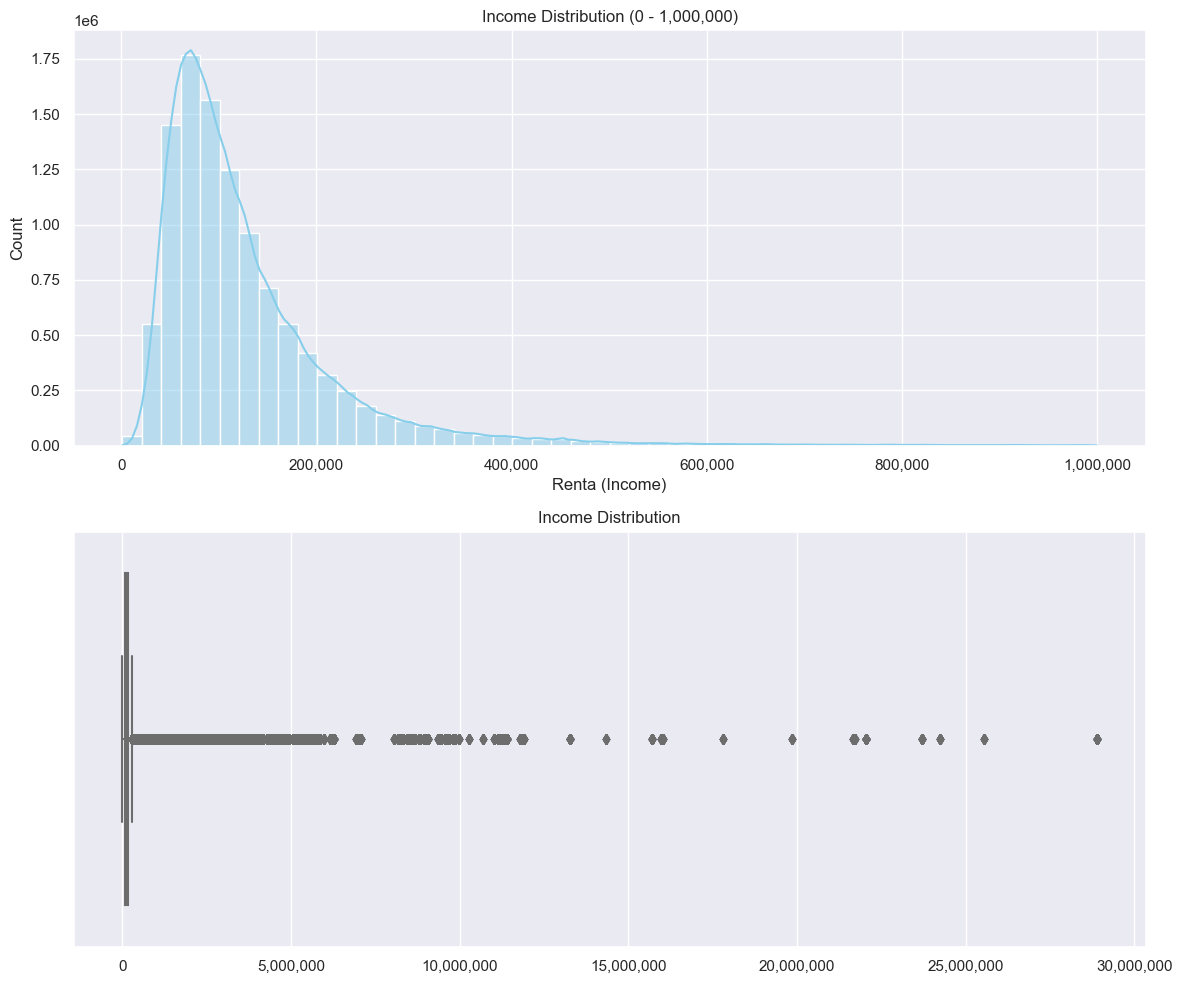

In [15]:
import matplotlib.ticker as ticker

df_train['renta'] = pd.to_numeric(df_train['renta'], errors='coerce')
df_renta = df_train['renta'].dropna()
df_renta_clean = df_renta[(df_renta > 0) & (df_renta < 1_000_000)]
# Plot income distribution again
fig, ax = plt.subplots(2,1, figsize=(12,10))
sns.histplot(df_renta_clean, bins=50, kde=True, color='skyblue',ax = ax[0])
ax[0].set_title('Income Distribution (0 - 1,000,000)')
ax[0].set_xlabel('Renta (Income)')
ax[0].set_ylabel('Count')
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

sns.boxplot(x=df_renta, ax = ax[1],color = 'salmon')
ax[1].set_title('Income Distribution')
ax[1].set(xlabel = None)
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()


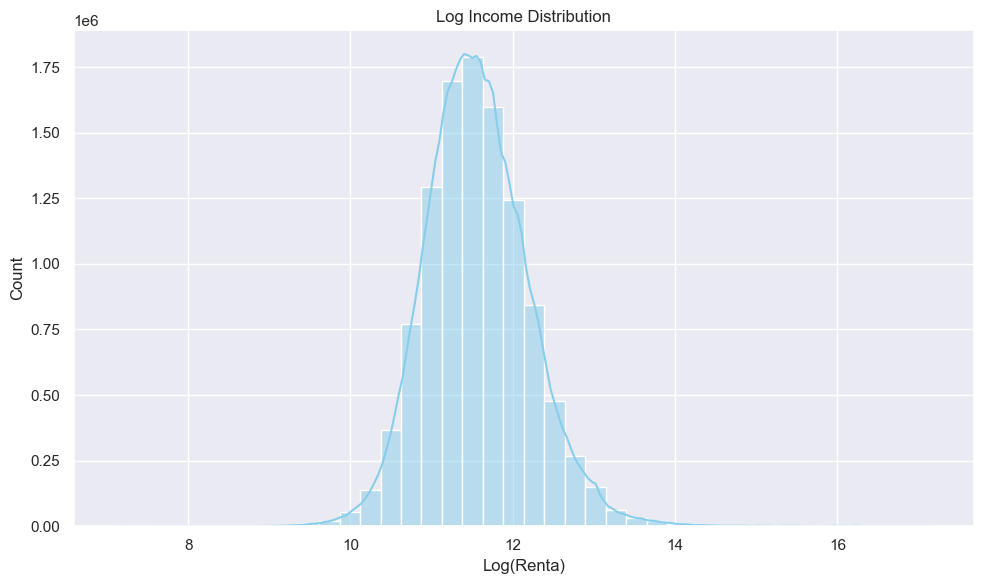

In [16]:
import numpy as np
df_renta_log = np.log1p(df_renta[df_renta > 0])

plt.figure(figsize=(10,6))
sns.histplot(df_renta_log, bins=40, kde=True, color='skyblue')
plt.title('Log Income Distribution')
plt.xlabel('Log(Renta)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


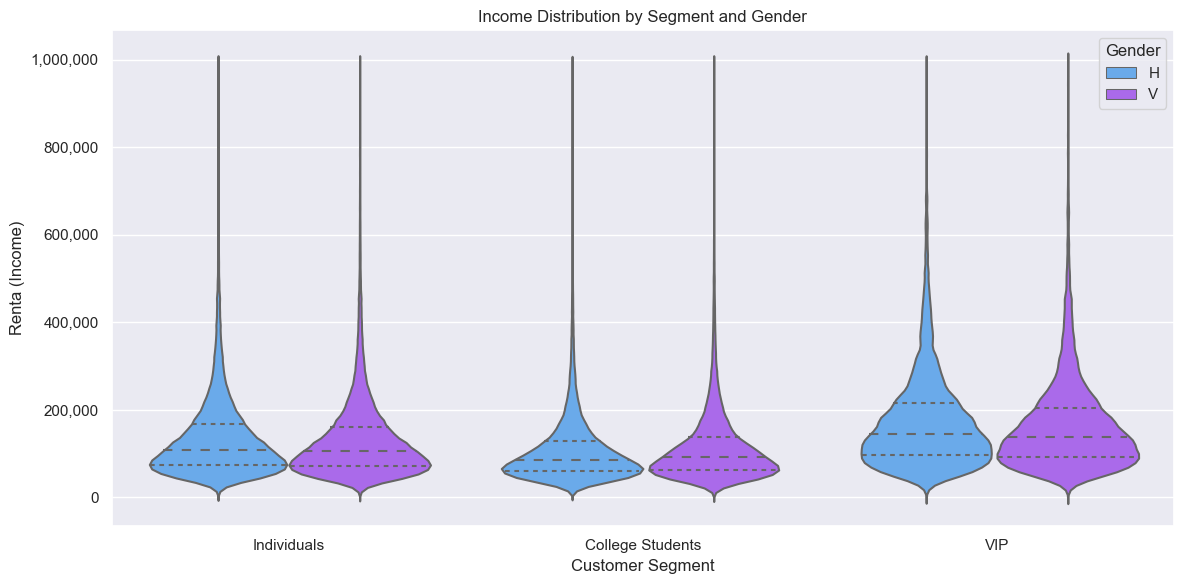

In [17]:
# Clean renta and filter out invalid/huge values
df_income_viz = df_train.dropna(subset=['renta', 'segmento', 'sexo']).copy()
df_income_viz = df_income_viz[df_income_viz['renta'] <= 1_000_000]  # cap extreme outliers

# Plot
df_income_viz.loc[:, 'segmento'] = df_income_viz['segmento'].replace(segment_labels)

plt.figure(figsize=(12,6))
sns.violinplot(x='segmento', y='renta', hue='sexo', data=df_income_viz, inner='quartile', palette='cool')
plt.title('Income Distribution by Segment and Gender')
plt.xlabel('Customer Segment')
plt.ylabel('Renta (Income)')
plt.legend(title='Gender')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y):,}'))
plt.tight_layout()
plt.show()


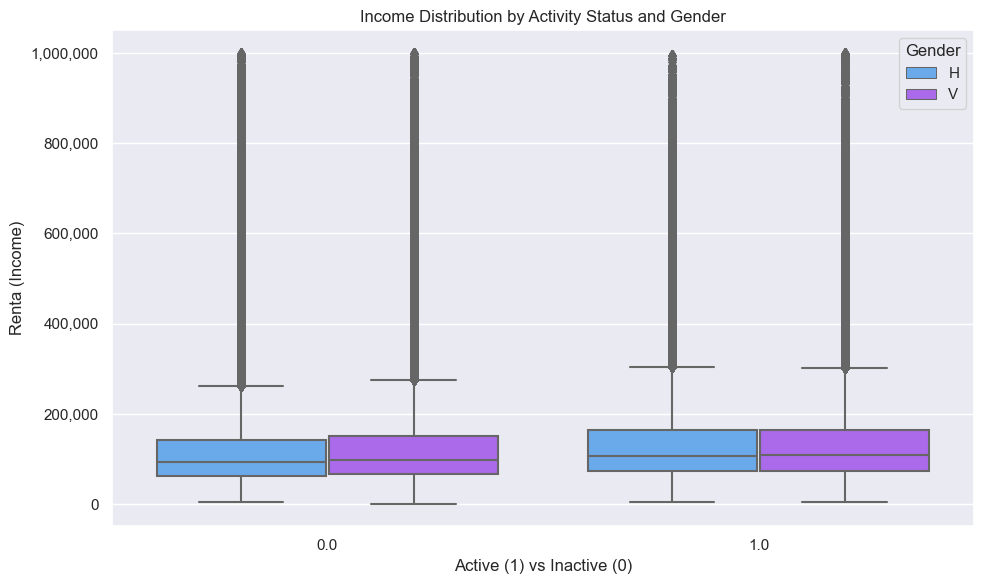

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x='ind_actividad_cliente', y='renta', hue='sexo', data=df_income_viz, palette='cool')
plt.title('Income Distribution by Activity Status and Gender')
plt.xlabel('Active (1) vs Inactive (0)')
plt.ylabel('Renta (Income)')
plt.legend(title='Gender')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y):,}'))
plt.tight_layout()
plt.show()


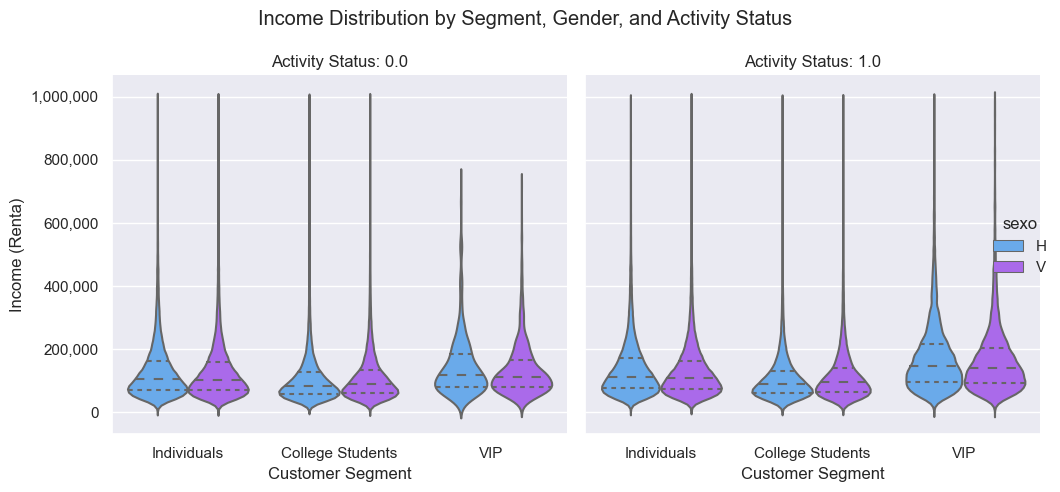

In [19]:
g = sns.catplot(
    data=df_income_viz,
    x='segmento', y='renta', hue='sexo',
    col='ind_actividad_cliente',
    kind='violin',
    palette='cool', inner='quartile'
)

g.set_titles("Activity Status: {col_name}")
g.set_axis_labels("Customer Segment", "Income (Renta)")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Income Distribution by Segment, Gender, and Activity Status")
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y):,}'))
plt.tight_layout()
plt.show()


### **Segment-wise product ownership patterns**

In [6]:
#Product Labels Mapped from Kaggle Documentation of Data
product_labels = {
    'ind_ahor_fin_ult1': 'Saving Account',
    'ind_aval_fin_ult1': 'Guarantees',
    'ind_cco_fin_ult1': 'Current Accounts',
    'ind_cder_fin_ult1': 'Derivada Account',
    'ind_cno_fin_ult1': 'Payroll Account',
    'ind_ctju_fin_ult1': 'Junior Account',
    'ind_ctma_fin_ult1': 'Más particular Account',
    'ind_ctop_fin_ult1': 'Particular Account',
    'ind_ctpp_fin_ult1': 'Particular Plus Account',
    'ind_deco_fin_ult1': 'Short-term Deposits',
    'ind_deme_fin_ult1': 'Medium-term Deposits',
    'ind_dela_fin_ult1': 'Long-term Deposits',
    'ind_ecue_fin_ult1': 'e-Account',
    'ind_fond_fin_ult1': 'Funds',
    'ind_hip_fin_ult1': 'Mortgage',
    'ind_plan_fin_ult1': 'Pensions',
    'ind_pres_fin_ult1': 'Loans',
    'ind_reca_fin_ult1': 'Taxes',
    'ind_tjcr_fin_ult1': 'Credit Card',
    'ind_valo_fin_ult1': 'Securities',
    'ind_viv_fin_ult1': 'Home Account',
    'ind_nomina_ult1': 'Payroll',
    'ind_nom_pens_ult1': 'Pension Income',
    'ind_recibo_ult1': 'Direct Debit'
}


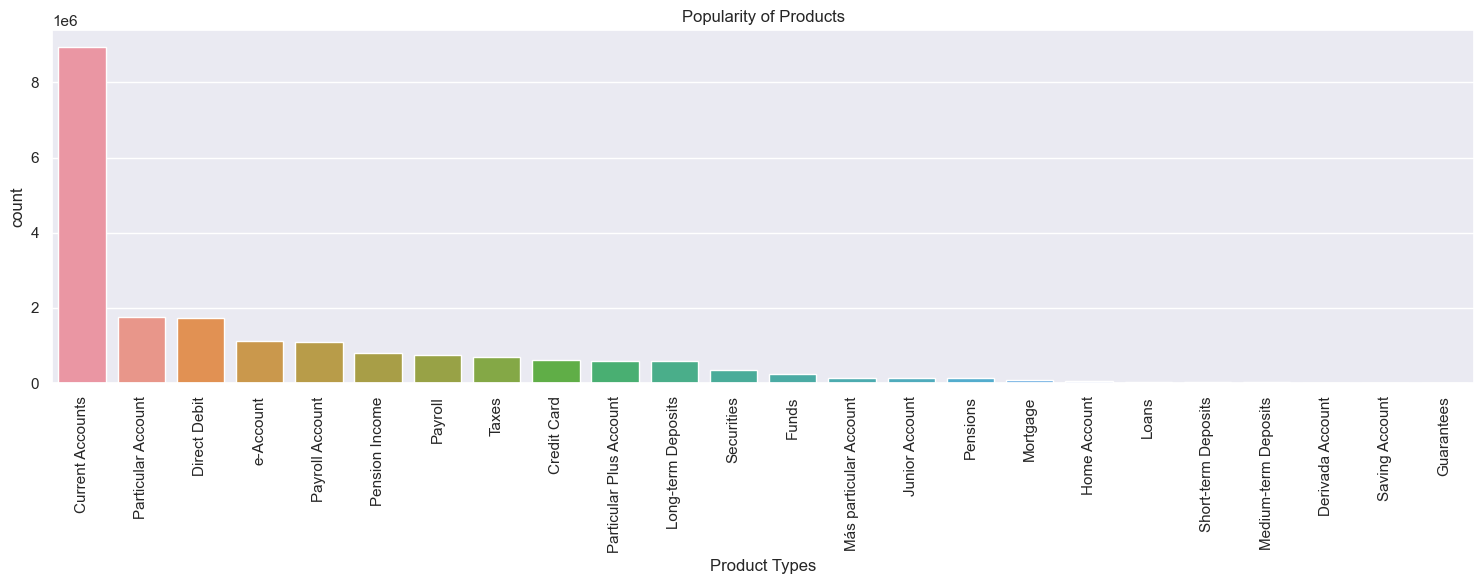

In [9]:
# Which products are most/least popular overall
ult1_columns = [col for col in df_train.columns if col.endswith('ult1')]

product_count = {}
for col in ult1_columns:
    sum_of_values = df_train[col].sum()
    product_count[col] = sum_of_values

product_df = pd.DataFrame(
    list(product_count.items()), 
    columns=['product', 'count']
)
product_df['product_name'] = product_df['product'].map(product_labels)
product_df.sort_values(by='count', ascending=False, inplace=True)
plt.figure(figsize=(15,6))
sns.barplot(x=product_df['product_name'], y = product_df['count'])
plt.title("Popularity of Products")
plt.xlabel("Product Types")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()


In [22]:
import plotly.express as px

df_product_segment_relation = df_train.groupby('segmento')[ult1_columns].mean()

df_melted = df_product_segment_relation.reset_index().melt(
    id_vars='segmento',
    var_name='product',
    value_name='ownership_rate'
)
df_melted['product_name'] = df_melted['product'].map(product_labels)

px.bar(df_melted, x='product_name',
       y = 'ownership_rate',
       color='segmento',
       title='Customer Segment w.r.t products owned',
       labels={
        "segmento": "Segment",
        "product_name" : "Product Name",
        "ownership_rate": "Ownership Rate (%)"
    }
       )



In [16]:
import plotly.express as px


df_train = df_train.dropna(subset = 'ind_actividad_cliente')
df_train['ind_actividad_cliente'] = df_train['ind_actividad_cliente'].astype(int)
df_product_segment_relation2 = df_train.groupby(['segmento','ind_actividad_cliente'])[ult1_columns].mean()


df_melted2 = df_product_segment_relation2.reset_index().melt(
    id_vars=['segmento','ind_actividad_cliente'],
    var_name='product',
    value_name='ownership_rate'
)
df_melted2['product'] = df_melted2['product'].map(product_labels)

fig = px.bar(
    df_melted2, 
    x='product', 
    y='ownership_rate', 
    color='ind_actividad_cliente',
    barmode='group',
    facet_col='segmento',
    title='Product Usage: Active vs Inactive Customers',
    labels={
        'product': 'Product',
        'count': 'Number of Customers',
        'ind_actividad_cliente': 'Customer Status',
        'ownership_rate':'Ownership Rate (%)'
    },
    color_discrete_map={0:'red',1:'blue'}
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()



In [15]:
df_product_segment_relation2

ind_ahor_fin_ult1  \
segmento           ind_actividad_cliente                      
01 - TOP           0                               0.000000   
                   1                               0.000208   
02 - PARTICULARES  0                               0.000098   
                   1                               0.000218   
03 - UNIVERSITARIO 0                               0.000000   
                   1                               0.000000   

                                          ind_aval_fin_ult1  ind_cco_fin_ult1  \
segmento           ind_actividad_cliente                                        
01 - TOP           0                               0.000000          0.241027   
                   1                               0.000231          0.615879   
02 - PARTICULARES  0                               0.000000          0.385952   
                   1                               0.000045          0.711577   
03 - UNIVERSITARIO 0                               0.000000          0.807463   
                   1                               0.000000          0.878745   

                                          ind_cder_fin_ult1  ind_cno_fin_ult1  \
segmento           ind_actividad_cliente                                        
01 - TOP           0                               0.000000          0.003521   
                   1                               0.001883          0.314694   
02 - PARTICULARES  0                               0.000130          0.002155   
                   1                               0.000910          0.180383   
03 - UNIVERSITARIO 0                               0.000002          0.001676   
                   1                               0.000026          0.110841   

                                          ind_ctju_fin_ult1  \
segmento           ind_actividad_cliente                      
01 - TOP           0                               0.000000   
                   1                               0.000228   
02 - PARTICULARES  0                               0.006044   
                   1                               0.025325   
03 - UNIVERSITARIO 0                               0.000006   
                   1                               0.000042   

                                          ind_ctma_fin_ult1  \
segmento           ind_actividad_cliente                      
01 - TOP           0                               0.043730   
                   1                               0.026320   
02 - PARTICULARES  0                               0.007053   
                   1                               0.019256   
03 - UNIVERSITARIO 0                               0.000134   
                   1                               0.005229   

                                          ind_ctop_fin_ult1  \
segmento           ind_actividad_cliente                      
01 - TOP           0                               0.031804   
                   1                               0.254716   
02 - PARTICULARES  0                               0.149247   
                   1                               0.245770   
03 - UNIVERSITARIO 0                               0.000375   
                   1                               0.018356   

                                          ind_ctpp_fin_ult1  \
segmento           ind_actividad_cliente                      
01 - TOP           0                               0.012040   
                   1                               0.154777   
02 - PARTICULARES  0                               0.027382   
                   1                               0.093340   
03 - UNIVERSITARIO 0                               0.000066   
                   1                               0.008259   

                                          ind_deco_fin_ult1  ...  \
segmento           ind_actividad_cliente                     ...   
01 - TOP           0                               0.067583  ...   
               

In [24]:
df_melted2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   segmento               144 non-null    object 
 1   ind_actividad_cliente  144 non-null    float64
 2   product                144 non-null    object 
 3   ownership_rate         144 non-null    float64
dtypes: float64(2), object(2)
memory usage: 4.6+ KB


Time-Based Dynamics
Use fecha_dato and fecha_alta to derive insights over time.

Customer acquisition trends

Monthly trend of customer joining (fecha_alta), grouped by segmento

Monthly distribution of dataset (fecha_dato)

Countplot of number of records per month (check for imbalances)

Trend of popular products over time

Lineplots showing how key products (e.g., ind_nomina_ult1) trend monthly

4️⃣ Customer Type & Relationship Variables
To understand behavioral patterns based on their bank relationship.

Customer relation type (tiprel_1mes)

Countplot by type (Active, Inactive, Former, Potential)

Product usage comparison by relation type

Residence & Foreigner index (indresi, indext)

Compare product patterns for foreign vs. local residents

Channel of joining (canal_entrada)

Most common channels and their associated product adoption rates

5️⃣ Geo-Demographic Analysis
Use cod_prov and nomprov for region-wise analysis.

Customer count by province

Barplot of top provinces by customer count

Product preference by region

Compare certain products across regions (e.g., mortgages in urban vs rural provinces)

6️⃣ Deceased and Missing/Invalid Value Analysis
Distribution of indfall (deceased flag) – remove or analyze how these affect data

Proportion of missing/invalid data in renta, age, etc.

Correlation heatmap of numeric variables to identify collinearity

